# Task 4 : Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import chardet
with open('car_purchasing.csv', 'rb') as f:
    result = chardet.detect(f.read())  
df = pd.read_csv("car_purchasing.csv",encoding=result['encoding'])

In [3]:
df

customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       net worth  car purchase amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 9 columns]

In [4]:
df.head()  # Print the first few rows of the dataset

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [5]:
df.shape   # Print the shape of the dataset (number of rows and columns)

(500, 9)

In [6]:
df.info()  # Print the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
df.describe()  # Print summary statistics of the dataset

gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

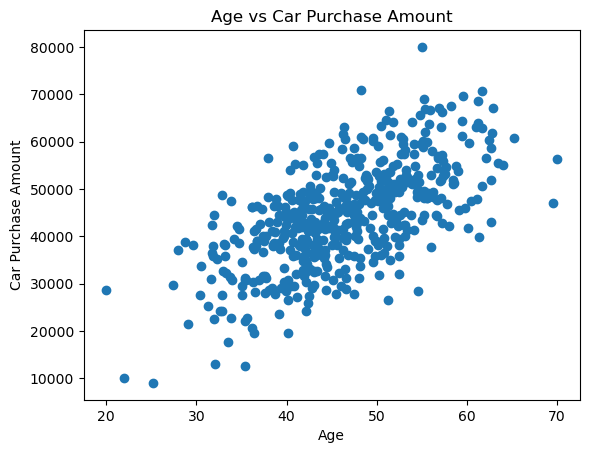

In [9]:
# Plotting a scatter plot of 'car purchase amount' with 'age'
plt.scatter(df['age'], df['car purchase amount'])
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Age vs Car Purchase Amount')
plt.show()

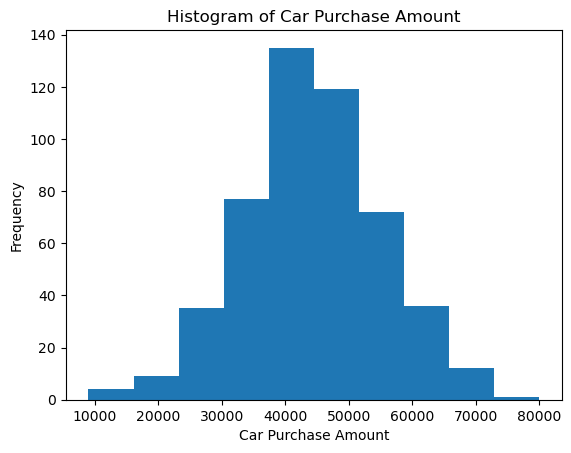

In [10]:

# Plotting a histogram of 'car purchase amount'
plt.hist(df['car purchase amount'], bins=10)
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Car Purchase Amount')
plt.show()

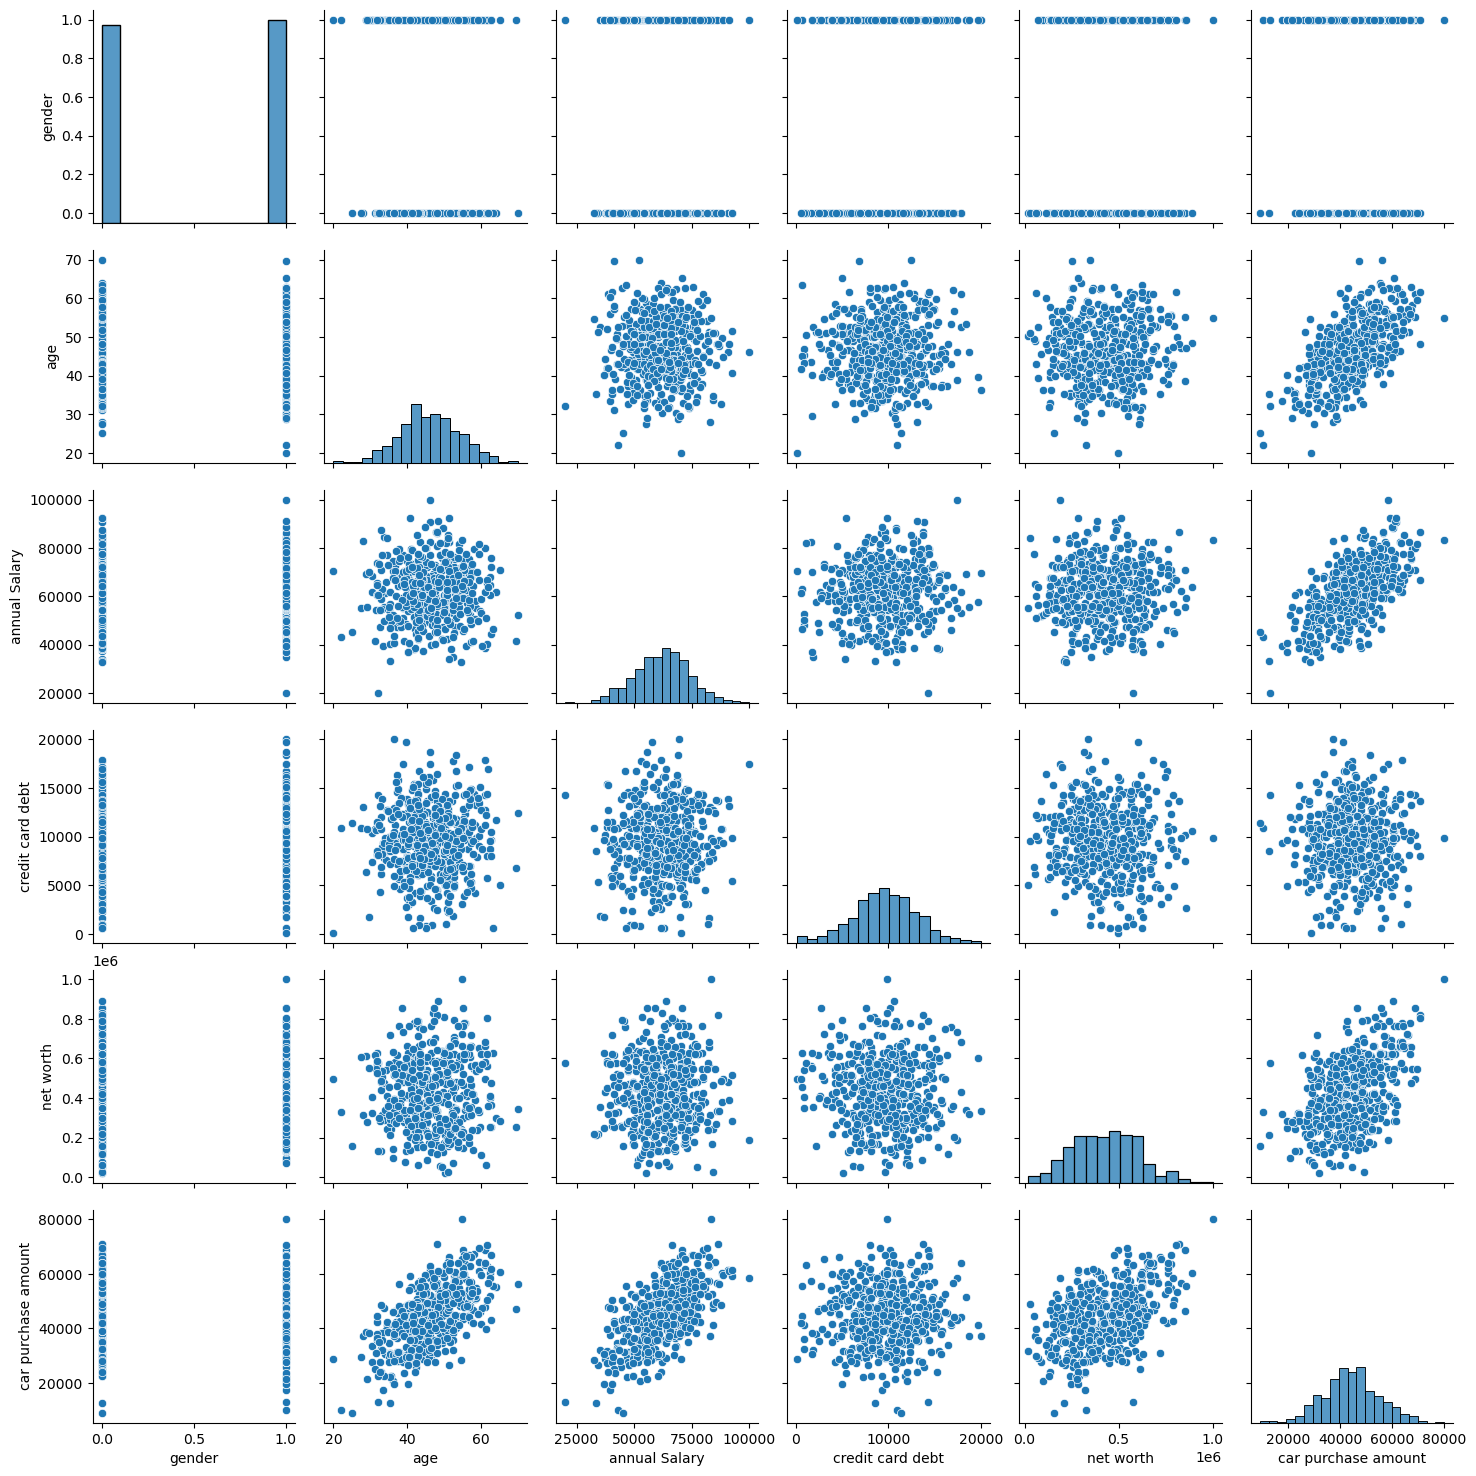

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
X = df[['age', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the r-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Squared Error: 2.0698043894601494
R-squared Score: 0.9999999808303804
